In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy import stats

mpl.rcParams.update({'font.size': 15})

In [2]:
# %config InlineBackend.figure_format = 'retina'

In [3]:
data = np.load("../../../test2.npy")

In [4]:
rearrang = np.where(data > 0.2, 1.0, 0.0)

In [5]:
rearrang = np.mean(rearrang, axis=0)

Text(0, 0.5, 'N')

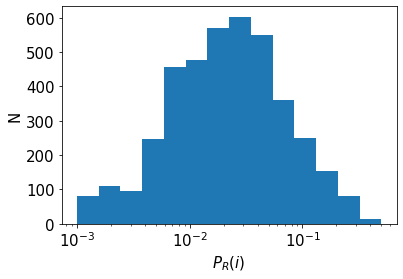

In [7]:
plt.hist(rearrang, bins=np.logspace(np.log10(1e-3),np.log10(0.5), 15))
plt.xscale('log')
plt.xlabel(r'$P_R(i)$')
plt.ylabel(r"N")


Text(0.5, 0, '$p_{hop}$')

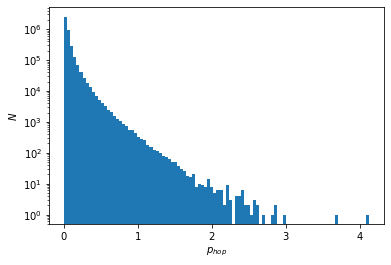

In [56]:
plt.hist(data.flatten(), bins=100);
plt.yscale('log')
plt.ylabel(r"$N$")
plt.xlabel(r"$p_{hop}$")

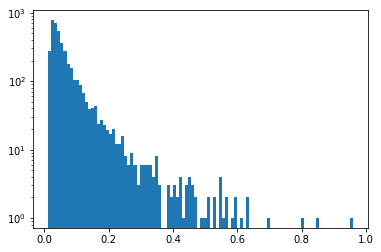

In [92]:
plt.hist(data[0], bins=100)
plt.yscale('log')

In [9]:
df = pd.read_parquet("../../../temp-0.55_seed-10_chunk-0.parquet")
df = df[df.frames == 0]
ids = df.ids.values
df.entropy = df.entropy*1.2/2.0

In [10]:
rearrangA = rearrang[ids]

In [11]:
import seaborn as sns

<AxesSubplot:xlabel='softness'>

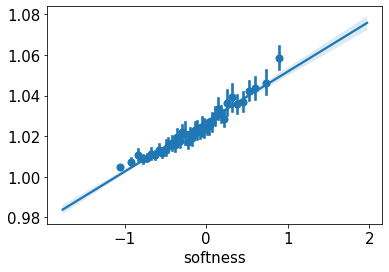

In [12]:
sns.regplot(data=df, x="softness", y=np.exp(rearrangA), x_bins=40)

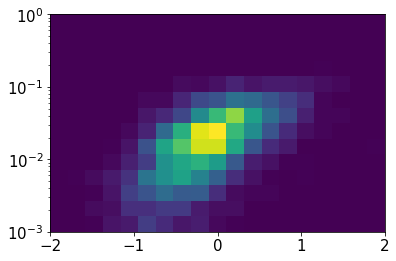

In [13]:
plt.hist2d(df.softness, rearrangA, bins=[np.linspace(-2, 2, 20), np.logspace(-3, 0, 15, base=10)]);
plt.yscale('log')

In [49]:
log_rearrang = np.log10(rearrangA)

/tmp/ipykernel_53843/4108268529.py:1: RuntimeWarning: divide by zero encountered in log10
  log_rearrang = np.log10(rearrangA)


In [70]:
log_rearrang.shape

(3278,)

In [62]:
np.ma.masked_array(log_rearrang, ~np.isfinite(log_rearrang))

masked_array(data=[-1.3872161432802645, -2.6989700043360187,
                   -1.5528419686577808, ..., -1.7695510786217261,
                   -1.031517051446065, -2.0969100130080562],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20)

In [69]:
np.ma.masked_array(log_rearrang, ~np.isfinite(log_rearrang)).shape

(3278,)

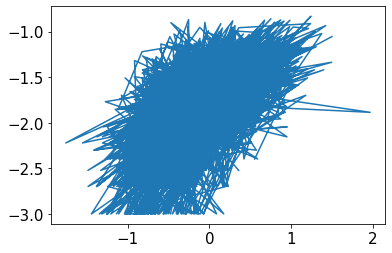

In [63]:
plt.plot(np.ma.masked_array(df.softness.values, ~np.isfinite(log_rearrang)), np.ma.masked_array(log_rearrang, ~np.isfinite(log_rearrang)))

In [64]:
stats.pearsonr(np.ma.masked_array(df.softness.values, ~np.isfinite(log_rearrang)), np.ma.masked_array(log_rearrang, ~np.isfinite(log_rearrang)))

/home/ian/Projects/work/monk/.venv/lib/python3.8/site-packages/scipy/stats/stats.py:3862: RuntimeWarning: invalid value encountered in subtract
  ym = y.astype(dtype) - ymean


ValueError: array must not contain infs or NaNs

In [58]:
stats.pearsonr(np.ma.masked_where(df.entropy.values, np.isfinite(log_rearrang)), np.ma.masked_where(log_rearrang, ~np.isfinite(log_rearrang)))

(-0.9999999999999991, 0.0)

<AxesSubplot:xlabel='entropy'>

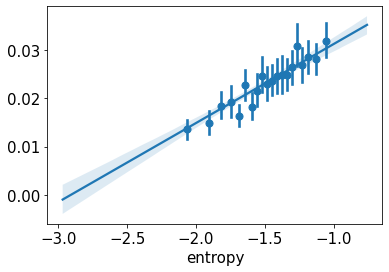

In [16]:
sns.regplot(data=df, x="entropy", y=rearrangA, x_bins=20)

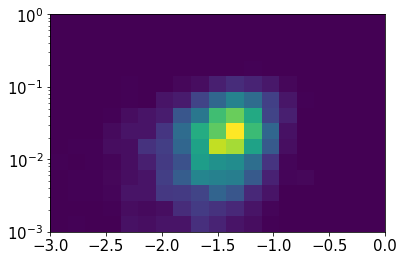

In [17]:
plt.hist2d(df.entropy, rearrangA, bins=[np.linspace(-3, 0, 20), np.logspace(-3, 0, 15, base=10)]);
plt.yscale('log')

In [90]:
pd.read_parquet("../../../test3.parquet").dtypes

frame        int16
id          uint16
replica      int16
phop       float32
dtype: object